## Aprendizaje supervisado con scikit-learn

El aprendizaje automático es el campo que enseña a las máquinas y computadoras a aprender de los datos existentes para hacer predicciones sobre los nuevos datos: 

- ¿Será un tumor benigno o maligno? 
- ¿Cuál de sus clientes llevará su negocio a otra parte?
- ¿Es un correo electrónico en particular spam?

Veremos como realizar aprendizaje supervisado, un componente esencial del aprendizaje automático.

Se contruye un modelo predictivo, ajustando parámetros determinando qué tan bien funcionarán con datos invisibles, todo mientras usamos conjuntos de datos del mundo real.

Usando scikit-learn, una de las bibliotecas de aprendizaje automático más populares y fáciles de usar para Python.

Revisaremos:

    - Clasificación
    - Regresión
    - Afinando el modelo
    - Preprocesamiento y tuberías

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib import pyplot as plt

plt.style.use('ggplot')

#Podemos cuidar el tamaño de nuestras gráficas en los cuadernos jupyter
plt.rcParams['figure.figsize'] = [25, 8]

### Conociendo los datos

Trabajaremos con un conjunto de datos obtenido del Repositorio de Aprendizaje Automático de la UCI que consta de los votos hechos por los Congresistas de la Cámara de Representantes de EE. UU.

El objetivo será predecir la afiliación partidaria ('demócrata' o 'republicano') en función de cómo votaron sobre ciertos temas clave.

Aquí, vale la pena señalar que hemos preprocesado este conjunto de datos para tratar con los valores faltantes.

In [3]:
df = pd.read_csv('https://assets.datacamp.com/production/repositories/628/datasets/35a8c54b79d559145bbeb5582de7a6169c703136/house-votes-84.csv')

df.columns = ['party', 'infants', 'water', 'budget', 'physician', 'salvador','religious', 'satellite', 'aid', 
              'missile', 'immigration', 'synfuels','education', 'superfund', 'crime', 'duty_free_exports', 'eaa_rsa']

df.head()

base = df

In [4]:
#Limpiando los datos convertiremos los signos "?" en 0 
base.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
1,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
2,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
3,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
4,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y


In [5]:
base.shape

(434, 17)

Tenemos 17 proyectos de ley y 434 democratas y republicanos, más adelante realizaremos un análisis exploratorio antes de proponer un modelo de clasificación

In [6]:
#Proyectos de ley
columna = base.iloc[:,1:].keys()
columna

Index(['infants', 'water', 'budget', 'physician', 'salvador', 'religious',
       'satellite', 'aid', 'missile', 'immigration', 'synfuels', 'education',
       'superfund', 'crime', 'duty_free_exports', 'eaa_rsa'],
      dtype='object')

En ocasiones no todos los congresistas votan, colocando un signo "?", veremos más adelante como trabajar con este tipo de datos faltantes.

In [7]:
def conteo_tmp(base,columna = 'infants'):
    
    return base.loc[:,columna].value_counts()

pd.DataFrame( [conteo_tmp(base, columna[i]) for i in range(0,len(columna))] )

,n,y,?
infants,235,187,12
water,192,194,48
budget,170,253,11
physician,247,176,11
salvador,208,211,15
religious,152,271,11
satellite,181,239,14
aid,177,242,15
missile,205,207,22
immigration,212,215,7


Convertiremos los no = 0 y yes = 1, para tener variables dicotomicas.

In [8]:
# Conteo de democrat y republican

#df.party.value_counts()

def remplazo(base,columna = 'infants'):
    base.loc[base.loc[:,columna] == 'y',columna] = 1
    base.loc[base.loc[:,columna] == 'n',columna] = 0
    base.loc[base.loc[:,columna] == '?',columna] = 0 #lo remplazaremos más adelante
    
    return base


In [9]:
for i in range(len(columna)):
    remplazo(base, columna[i])

In [10]:
base.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0
1,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
2,democrat,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1
3,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1
4,democrat,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1


In [11]:
#Nuevo conteo con los no = 0 y yes = 1
pd.DataFrame( [conteo_tmp(base, columna[i]) for i in range(0,len(columna))] )

,0,1
infants,247,187
water,240,194
budget,181,253
physician,258,176
salvador,223,211
religious,163,271
satellite,195,239
aid,192,242
missile,227,207
immigration,219,215


**Algunas Graficas proyecto de ley**

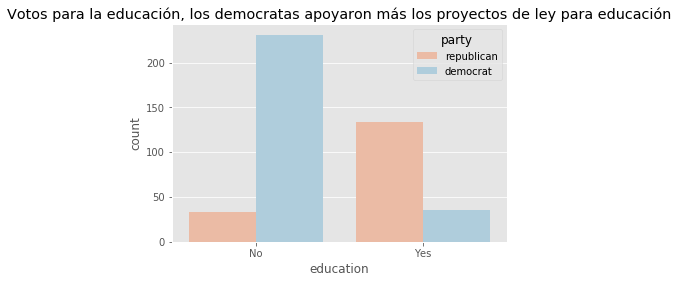

In [12]:
plt.figure()
sns.countplot(x='education', hue='party', data=base, palette='RdBu')
plt.title("Votos para la educación, los democratas apoyaron más los proyectos de ley para educación")
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

In [13]:
# Convertimos todo en una nueva base donde en una columna tenemos el partido, en otra todos los proyectos y las votaciones
base_melt = pd.melt(base.iloc[:,:5], id_vars = "party")

base_melt.variable.value_counts()

infants      434
water        434
physician    434
budget       434
Name: variable, dtype: int64

In [14]:
base_melt.head(3)

,party,variable,value
0,republican,infants,0
1,democrat,infants,0
2,democrat,infants,0


In [15]:
base_melt.party = base_melt.party.astype("category")
base_melt.variable = base_melt.variable.astype("category")
base_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1736 entries, 0 to 1735
Data columns (total 3 columns):
party       1736 non-null category
variable    1736 non-null category
value       1736 non-null object
dtypes: category(2), object(1)
memory usage: 17.3+ KB


In [16]:
#Conteo de votos para algunas leyes
tmp = pd.DataFrame(base_melt.groupby(['party','variable','value']).size()).reset_index()
tmp.columns = ['party','variable','value','votos']
tmp

,party,variable,value,votos
0,democrat,budget,0,36
1,democrat,budget,1,231
2,democrat,infants,0,111
3,democrat,infants,1,156
4,democrat,physician,0,253
5,democrat,physician,1,14
6,democrat,water,0,147
7,democrat,water,1,120
8,republican,budget,0,145
9,republican,budget,1,22


### Modelo k-Nearest Neighbors: Fit (Clasificación)

Habiendo explorado el conjunto de datos de los registros de votación del Congreso, es hora de construir su primer clasificador.

En este ejercicio, ajustará un clasificador k-Nearest Neighbours al conjunto de datos de votación, que una vez más se ha cargado previamente en un DataFrame base.



In [25]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier 

# Create arrays for the features and the response variable
y = base['party'].values
X = base.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

Toma un vector del mismo tamaño que el numero de proyectos o culumnas

In [26]:
knn.predict(X)[0:10]

array(['republican', 'democrat', 'democrat', 'democrat', 'democrat',
       'republican', 'republican', 'republican', 'democrat', 'republican'],
      dtype=object)

In [27]:
new_prediction = knn.predict([[0.696469, 0.286139,  0.226851 , 0.551315 , 0.719469 , 0.423106 , 0.980764, 0.68483,  0.480932,  0.392118,  0.343178,  0.72905,  0.438572,  0.059678, 0.398044,  0.737995]])

In [28]:
print("Prediction: {}".format(new_prediction)) 

Prediction: ['democrat']


In [31]:
y_pred = knn.

array(['republican', 'democrat', 'democrat', 'democrat', 'democrat',
       'democrat', 'republican', 'republican', 'democrat', 'republican',
       'republican', 'democrat', 'democrat', 'republican', 'republican',
       'democrat', 'democrat', 'republican', 'democrat', 'democrat',
       'democrat', 'democrat', 'democrat', 'democrat', 'democrat',
       'democrat', 'democrat', 'republican', 'democrat', 'republican',
       'democrat', 'democrat', 'republican', 'democrat', 'republican',
       'republican', 'republican', 'republican', 'democrat', 'democrat',
       'democrat', 'democrat', 'democrat', 'democrat', 'democrat',
       'democrat', 'democrat', 'democrat', 'republican', 'democrat',
       'republican', 'democrat', 'republican', 'democrat', 'republican',
       'republican', 'republican', 'republican', 'republican', 'democrat',
       'republican', 'democrat', 'democrat', 'democrat', 'republican',
       'republican', 'republican', 'democrat', 'democrat', 'democrat',
       '

In [29]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix




dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping 

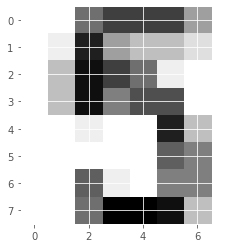

In [22]:
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits.DESCR)

# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [23]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.9833333333333333


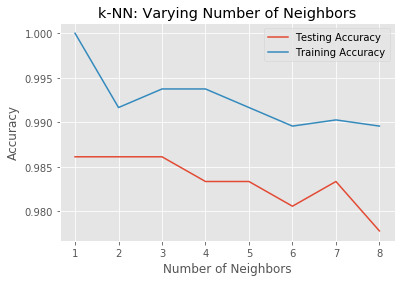

In [24]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

### Regresión

In [58]:
gapminder = pd.read_csv("https://assets.datacamp.com/production/repositories/628/datasets/a7e65287ebb197b1267b5042955f27502ec65f31/gm_2008_region.csv")

gapminder = gapminder.drop("Region", axis = 1)

gapminder.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2


In [71]:
# Create arrays for features and target variable
y = gapminder['life'].values
X_fertility = gapminder['fertility'].values

# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

# Reshape X and y
y = y.reshape(-1, 1)
X_fertility = X_fertility.reshape(-1, 1)

# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))

Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139, 1)
Dimensions of y after reshaping: (139, 1)
Dimensions of X after reshaping: (139, 1)


In [69]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 9 columns):
population         139 non-null float64
fertility          139 non-null float64
HIV                139 non-null float64
CO2                139 non-null float64
BMI_male           139 non-null float64
GDP                139 non-null float64
BMI_female         139 non-null float64
life               139 non-null float64
child_mortality    139 non-null float64
dtypes: float64(9)
memory usage: 9.9 KB


In [68]:
gapminder.describe()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
count,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,3.549977e+07,3.005108,1.915612,4.459874,24.623054,16638.784173,126.701914,69.602878,45.097122
std,1.095121e+08,1.615354,4.408974,6.268349,2.209368,19207.299083,4.471997,9.122189,45.724667
min,2.773150e+05,1.280000,0.060000,0.008618,20.397420,588.000000,117.375500,45.200000,2.700000
25%,3.752776e+06,1.810000,0.100000,0.496190,22.448135,2899.000000,123.232200,62.200000,8.100000
50%,9.705130e+06,2.410000,0.400000,2.223796,25.156990,9938.000000,126.519600,72.000000,24.000000
75%,2.791973e+07,4.095000,1.300000,6.589156,26.497575,23278.500000,130.275900,76.850000,74.200000
max,1.197070e+09,7.590000,25.900000,48.702062,28.456980,126076.000000,135.492000,82.600000,192.000000


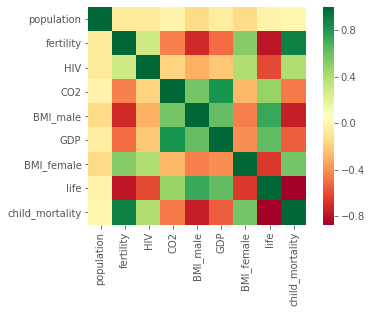

In [67]:
import seaborn as sns

sns.heatmap(gapminder.corr(), square=True, cmap='RdYlGn')

0.6192442167740037


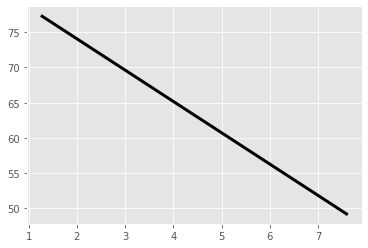

In [73]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_fertility, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(reg.score(X_fertility, y))

# Plot regression line
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()


In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.7298987360907494
Root Mean Squared Error: 4.194027914110243


In [75]:
# Import the necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X, y, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

# Print the average 5-fold cross-validation score
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.71001079 0.75007717 0.55271526 0.547501   0.52410561]
Average 5-Fold CV Score: 0.6168819644425119


In [76]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Perform 3-fold CV
cvscores_3 = cross_val_score(reg, X, y, cv = 3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(reg, X, y, cv = 10)
print(np.mean(cvscores_10))


0.6294715754653507
0.5883937741571185


In [83]:
gapminder_columns = gapminder.columns

len(gapminder_columns)

9

In [87]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4, normalize=True)

# Fit the regressor to the data
lasso.fit(X, y)


Lasso(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

[-1.51388042]


ValueError: x and y must have same first dimension, but have shapes (9,) and (1,)

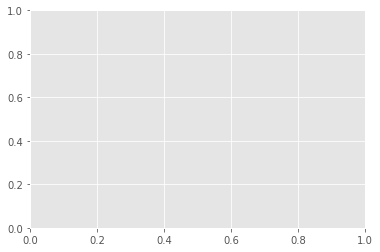

In [88]:
# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

# Plot the coefficients
plt.plot(range(len(gapminder_columns)), lasso_coef)
plt.xticks(range(len(gapminder_columns)), gapminder_columns.values, rotation=60)
plt.margins(0.02)
plt.show()


### Afinando el modelo

Habiendo entrenado su modelo, su próxima tarea es evaluar su desempeño.

En este capítulo, aprenderá sobre algunas de las otras métricas disponibles en scikit-learn que le permitirán evaluar el rendimiento de su modelo de una manera más matizada.

A continuación, aprenda a optimizar sus modelos de clasificación y regresión mediante el ajuste de hiperparámetros.

###### Matriz de confusión

Ayuda a medir el rendimiento de un modelo de clasificación por medio del analisis de verdaderos positivos y negativos.

